# 학교 안전사고 현황 분석

- 코드 작성자 : 최은혜
- 코드 작성일 : 2024-07-06

## 0. 라이브러리 및 데이터 임포트

In [346]:
import pandas as pd
import numpy as np
import polars as pl
from datetime import datetime
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# !pip install geopandas
import geopandas as gpd
import json

# 팔레트 색깔
palette = ["#5c7dd2","#92b8ff","#aeceff","#c7e4ff",'#c3b7eb', '#9590e6', '#837ed5']
palette_blue =["#5fa8d3", "#cae9ff", "#1b4965", "#62b6cb", "#bee9e8"]
palette_purple = [ "#39324E", "#9f86c0", "#be95c4", "#EBC7DB","#5e548e"]


In [2]:
# df_2019 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2019')
# df_2020 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2020')
# df_2021 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2021')
# df_2022 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2022')
# df_2023 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2023').rename(columns={'매개물':'사고매개물'})

In [3]:
# df = pd.concat([df_2019,df_2020,df_2021,df_2022,df_2023])
# df.to_csv('학교안전사고데이터_통합.csv',index=False,encoding='utf-8-sig')

In [4]:

# df = df.to_pandas()

# df['사고발생일'] = pd.to_datetime(df['사고발생일'])

# df_before_2018 = df.query("사고발생일 < '2019-01-01'")
# df_2019 = df[df['사고발생일'].between('2019-01-01', '2019-12-31')]
# df_2020 = df[df['사고발생일'].between('2020-01-01', '2020-12-31')]
# df_2021 = df[df['사고발생일'].between('2021-01-01', '2021-12-31')]
# df_2022 = df[df['사고발생일'].between('2022-01-01', '2022-12-31')]
# df_2023 = df[df['사고발생일'].between('2023-01-01', '2023-12-31')]

In [5]:
# df.to_csv('학교안전사고데이터_통합.csv',index=False,encoding='utf-8-sig')

In [6]:
# df = df[df['사고발생일'].between('2019-01-01', '2023-12-31')]

In [64]:
df = pl.read_csv('../../data/학교안전사고데이터통합/학교안전사고데이터_통합.csv')
df = df.to_pandas()
df['사고발생일'] = pd.to_datetime(df['사고발생일'])
df['연도'] = df['사고발생일'].map(lambda x : x.year)

df_2019 = df[df['사고발생일'].between('2019-01-01', '2019-12-31')]
df_2020 = df[df['사고발생일'].between('2020-01-01', '2020-12-31')]
df_2021 = df[df['사고발생일'].between('2021-01-01', '2021-12-31')]
df_2022 = df[df['사고발생일'].between('2022-01-01', '2022-12-31')]
df_2023 = df[df['사고발생일'].between('2023-01-01', '2023-12-31')]

In [8]:
df

,구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생일,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물,연도
0,A0000209,중학교,경기,안양과천교육지원청,공립,일반학생,남,1학년,2019-01-02,수,09:00,수업시간,부속시설,다리,낙상-미끄러짐,기타운동,건물(문/창문/바닥/벽 등),2019
1,A0000261,초등학교,경기,안양과천교육지원청,공립,일반학생,남,2학년,2019-01-02,수,08:50,등하교,통로,치아(구강),낙상-넘어짐,보행/주행,건물(문/창문/바닥/벽 등),2019
2,A0000262,중학교,경기,부천교육지원청,공립,일반학생,여,1학년,2019-01-02,수,10:20,체육수업,부속시설,손,기타,구기운동,기타,2019
3,A0000310,초등학교,광주,서부교육지원청,공립,일반학생,여,2학년,2019-01-02,수,10:35,휴식시간 및 청소시간,운동장,머리(두부),낙상-넘어짐,장난/놀이,자연(사람/동물/식물 등),2019
4,A0000316,중학교,충북,청주교육지원청,공립,일반학생,남,2학년,2019-01-02,수,09:10,체육수업,부속시설,발,낙상-미끄러짐,보행/주행,건물(문/창문/바닥/벽 등),2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611955,E0193173,중학교,제주,서귀포시교육지원청,공립,일반학생,여,2학년,2023-12-11,월,14:10,쉬는시간,교실,팔,물리적힘 노출,장난/놀이,건물(문/창문/바닥/벽 등),2023
611956,E0193174,중학교,제주,제주시교육지원청,공립,일반학생,남,1학년,2023-12-08,금,13:20,쉬는시간,통로,다리,사람과의 충돌,식사/수면/휴식,자연(사람/동물/식물 등),2023
611957,E0193175,중학교,제주,제주시교육지원청,공립,일반학생,여,3학년,2023-12-04,월,09:20,특별활동,운동장,손,물리적힘 노출,구기운동,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),2023
611958,E0193176,중학교,제주,제주시교육지원청,공립,일반학생,남,1학년,2023-12-13,수,12:25,식사시간,부속시설,발,낙상,장난/놀이,자연(사람/동물/식물 등),2023


## 1. 학교 안전사고 현황 EDA

### 1-1. 연도별 사고 현황

### 1-2. 지역별 사고 현황

- 시도별 사고 현황
    - 시도별 총 사고건수
    - 시도별 연도별 전체 사고건수
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 학교 비율
        -  전체 학교 중 안전사고가 발생한 학교의 비율(2021년 동작구의 전체 학교 N곳 중 M곳의 학교에서 안전사고가 발생했다.)
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 건수
- 시군구별 사고 현황
    - 시군구별 총 사고 건수 (시도별에서 시도를 선택하면 확인할 수 있도록)
    - 시군구별 연도별 총 사고건수
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 학교 비율
        -  전체 학교 중 안전사고가 발생한 학교의 비율(2021년 동작구의 전체 학교 N곳 중 M곳의 학교에서 안전사고가 발생했다.)
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 건수

In [9]:
df_2023.교육청.unique()

'''
교육청(시도)
교육지원청(시군구) --> 시군구별 분석 가능
    교육지원청은 시·도 교육청의 하급 교육행정기관으로, 교육장(3급 또는 4급 상당)의 감독 아래 시·도의 교육·학예에 관한 사무를 일부 분장한다. 
'''

'\n교육청(시도)\n교육지원청(시군구) --> 시군구별 분석 가능\n    교육지원청은 시·도 교육청의 하급 교육행정기관으로, 교육장(3급 또는 4급 상당)의 감독 아래 시·도의 교육·학예에 관한 사무를 일부 분장한다. \n'

### 1-3. 학교급별 사고 현황

- 학교급별 (연도별) 총 사고 수
- 학교급별 (연도별) 학년별 사고 수
- 학교급별 (연도별) 성별별 사고 수
- 학교급별 하루 평균 발생 사고 수 : 초등학교에선 하루에 평균 몇 건의 사고가 발생하는지?
- 학교급별 사고 내용 (사고 형태, 사과 당시 활동, 사고매개물)
    - 학교급별 사고 내용에 대한 비교 (초등학교는 어떤 사고가 주로 발생하고, 중학교는 어떤 사고가 주로 발생하는지를 파악하고자 하는 내용)

In [10]:
df_2023.학교급.unique()

array(['중학교', '초등학교', '고등학교', '유치원', '특수학교', '기타학교'], dtype=object)

In [11]:
df_2023.groupby('학교급').count()['구분']

학교급
고등학교    38271
기타학교      586
유치원      9125
중학교     69556
초등학교    70039
특수학교      707
Name: 구분, dtype: int64

In [12]:
'''
해당연도 사고 접수일 기준 데이터이므로 
사고 발생연도는 해당연도 외 다른 연도 데이터도 포함 ( 발생연도 기준 분석 필요 )
'''
temp = df_2023[df_2023['학교급']=='초등학교'].groupby(['사고발생일']).count()['구분']
temp


사고발생일
2023-01-02     86
2023-01-03     95
2023-01-04     67
2023-01-05     57
2023-01-06     46
             ... 
2023-12-23      1
2023-12-26    200
2023-12-27    163
2023-12-28     97
2023-12-29     28
Name: 구분, Length: 332, dtype: int64

In [13]:
'''
하루 평균 134건 실화야?? 이상치 제거 해야할듯 하루에 너무 많이 발생한 날은 제외시키고 다시보기...
'''
temp.describe()

count    332.000000
mean     210.960843
std      179.661552
min        1.000000
25%       11.000000
50%      280.500000
75%      380.000000
max      571.000000
Name: 구분, dtype: float64

### 1-4. 사고 내용 분석

- 장소별 사고 현황
    - 장소별 사고 발생 건수 (누적? 연도별?)
    - 장소별 하루 평균 사고 발생 건수 : 해당 장소에서 하루에 얼마나 사고가 발생하는지?
    - 장소별 사고 부위, 사고 형태



In [14]:
def get_grouped_count(df,col,year):
    if col=='사고장소':
        df[col].replace('교외활동','교외',inplace=True)
    new_df = df.groupby(col).count()[['구분']]
    new_df['퍼센트'] = round(new_df/new_df.sum()*100,1)
    new_df.reset_index(inplace=True)
    new_df.columns = [col,'사고건수','퍼센트']
    new_df['연도'] = year
    new_df.sort_values('사고건수',ascending=False,inplace=True)
    return new_df

#### 2023년 장소별 하루 평균 발생 건수

In [15]:
acc_spot_oneday_2023 = df_2023.groupby(['사고장소']).count()[['구분']].reset_index()
acc_spot_oneday_2023['하루평균발생사고수'] = round(acc_spot_oneday_2023['구분']/365,2)
acc_spot_oneday_2023.columns = ['사고장소','총사고수','하루평균발생사고수']
acc_spot_oneday_2023

,사고장소,총사고수,하루평균발생사고수
0,교실,29852,81.79
1,교외,9793,26.83
2,부속시설,69539,190.52
3,운동장,54015,147.99
4,통로,25085,68.73


#### 장소별 5개년 사고발생 비율

In [381]:
def get_grouped_count_spot(df,col,year):
    new_df = df.groupby(col).count()[['구분']].replace('교외활동','교외')
    new_df = new_df.groupby(col).count()[['구분']]
    new_df['퍼센트'] = round(new_df/new_df.sum()*100,2)
    new_df['퍼센트'] = new_df['퍼센트'].map(lambda x : str(x)+'%')
    new_df.reset_index(inplace=True)
    new_df.columns = [col,'사고건수','퍼센트']
    new_df['연도'] = str(year)
    new_df[['연도','사고장소']]
    return new_df

In [382]:
acc_spot_2019 = get_grouped_count(df_2019,'사고장소',2019)
acc_spot_2020 = get_grouped_count(df_2020,'사고장소',2020)
acc_spot_2021 = get_grouped_count(df_2021,'사고장소',2021)
acc_spot_2022 = get_grouped_count(df_2022,'사고장소',2022)
acc_spot_2023 = get_grouped_count(df_2023,'사고장소',2023)

acc_spot = pd.concat([acc_spot_2019,acc_spot_2020,acc_spot_2021,acc_spot_2022,acc_spot_2023])
acc_spot

C:\Users\csp47\AppData\Local\Temp\ipykernel_3928\949801274.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\csp47\AppData\Local\Temp\ipykernel_3928\949801274.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\csp47\AppData\Local\Temp\ipykernel_3928\949801274.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\csp47\AppData\Local\Temp\ipykernel_3928\949801274.py:3: SettingWithCopyWarning:


A value is tryi

,사고장소,사고건수,퍼센트,연도
3,운동장,50750,36.5,2019
2,부속시설,37260,26.8,2019
0,교실,24471,17.6,2019
4,통로,20700,14.9,2019
1,교외,5782,4.2,2019
2,부속시설,13327,33.8,2020
3,운동장,11850,30.0,2020
0,교실,7802,19.8,2020
4,통로,5087,12.9,2020
1,교외,1389,3.5,2020


In [17]:
# go 모듈 사용
# import plotly.graph_objects as go
# animals=['giraffes', 'orangutans', 'monkeys']

# fig = go.Figure(data=[
#     go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
#     go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()

In [18]:



# px 모듈 사용
# import plotly.express as px

# palette = [
#     "#231942",
#     "#5e548e",
#     "#9f86c0",
#     "#be95c4",
#     "#e0b1cb"
# ]

# fig = px.histogram(acc_spot, x="사고장소", y="사고건수",
#              color='연도', barmode='group',
#              height=500,
#              width=1200,
#              color_discrete_sequence=palette,
#              hover_name="연도")

# fig.update_traces(
#              hovertemplate='사고건수: %{y}건'+'<br>사고장소: %{x}')

# fig.update_layout(
#             font=dict({'family':'KoPubWorld돋움체_Pro',
#                       'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
#             hoverlabel=dict(        #호버 박스 폰트 설정
#                 # bgcolor="white",
#                 font_size=15,
#                 font_family="KoPubWorld돋움체_Pro"
#             ),
#             paper_bgcolor='white',  # 전체 배경색
#             plot_bgcolor='white',    # 플롯 배경색
#             # yaxis_ticksuffix=" ",
#             )


# # legend bold처리
# # fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))

# fig.update_xaxes(title=' ',
#                  title_font_family='KoPubWorld돋움체 Medium',
#                  tickfont=dict(size=17))

# fig.update_yaxes(title=' ',
#                  title_font_family='KoPubWorld돋움체 Medium',
#                  tickformat="~2s",
#                  tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
#                  )

# fig.show()

In [23]:
def draw_stack_chart(df,y_list):
    fig = px.bar(acc_spot_5years, x="연도", y=y_list, 
            #  title="5개년 장소별 학교 안전사고 발생 추이",
             color_discrete_sequence=palette,
             height=500,
             width=1000)

    hover_text = df.columns[0] + ': %{x}<br>' + df.columns[1] + ': %{y}건'
    fig.update_traces(
                hovertemplate=hover_text)
    fig.update_layout(
                font=dict({'family':'KoPubWorld돋움체_Pro',
                        'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
                hoverlabel=dict(        #호버 박스 폰트 설정
                    # bgcolor="white",
                    font_size=15,
                    font_family="KoPubWorld돋움체_Pro"
                ),
                paper_bgcolor='white',  # 전체 배경색
                plot_bgcolor='white',    # 플롯 배경색
                yaxis_ticksuffix="%",
                legend_title_text=' '
                )

    fig.update_xaxes(title=' ',
                    title_font_family='KoPubWorld돋움체 Medium',
                    tickfont=dict(size=17))

    fig.update_yaxes(title=' ',
                    # title_font_family='KoPubWorld돋움체 Medium',
                    # tickformat="~2s",
                    # tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
                    )

    fig.show()

In [394]:
acc_spot

,사고장소,사고건수,퍼센트,연도
3,운동장,50750,36.5,2019
2,부속시설,37260,26.8,2019
0,교실,24471,17.6,2019
4,통로,20700,14.9,2019
1,교외,5782,4.2,2019
2,부속시설,13327,33.8,2020
3,운동장,11850,30.0,2020
0,교실,7802,19.8,2020
4,통로,5087,12.9,2020
1,교외,1389,3.5,2020


In [402]:
df.groupby('사고장소').count()[['구분']].replace('교외활동','교외')

,구분
사고장소,
교실,101136
교외,10084
교외활동,15910
부속시설,201897
운동장,199856
통로,83077


In [406]:
new_df = df.groupby('사고장소').count()[['구분']].reset_index().replace('교외활동','교외')
new_df = new_df.groupby('사고장소').sum()[['구분']]
new_df
new_df['퍼센트'] = round(new_df/new_df.sum()*100,2)
new_df
# new_df.reset_index(inplace=True)
# new_df.columns = [col,'사고건수','퍼센트']
# new_df['연도'] = str(year)

,구분,퍼센트
사고장소,,
교실,101136,16.53
교외,25994,4.25
부속시설,201897,32.99
운동장,199856,32.66
통로,83077,13.58


In [368]:
acc_spot_5years = acc_spot.pivot_table(index='연도', columns='사고장소', values=['사고건수','퍼센트']).reindex(index=[2019,2020,2021,2022,2023])
acc_spot_5years

사고건수                              퍼센트                       
사고장소     교실    교외   부속시설    운동장     통로    교실   교외  부속시설   운동장    통로
연도                                                                 
2019  24471  5782  37260  50750  20700  17.6  4.2  26.8  36.5  14.9
2020   7802  1389  13327  11850   5087  19.8  3.5  33.8  30.0  12.9
2021  15624  3043  34130  29450  12412  16.5  3.2  36.1  31.1  13.1
2022  23387  5987  47641  53791  19793  15.5  4.0  31.6  35.7  13.1
2023  29852  9793  69539  54015  25085  15.9  5.2  36.9  28.7  13.3

In [386]:
acc_spot_5years = acc_spot.pivot_table(index='연도', columns='사고장소', values=['사고건수','퍼센트']).reindex(index=[2019,2020,2021,2022,2023])
acc_spot_5years.fillna(0, inplace=True)
acc_spot_5years['퍼센트'][location]

연도
2019    14.9
2020    12.9
2021    13.1
2022    13.1
2023    13.3
Name: 통로, dtype: float64

In [409]:
# 5개년 장소 데이터프레임 생성
acc_spot_5years = acc_spot.pivot_table(index='연도', columns='사고장소', values=['사고건수','퍼센트']).reindex(index=[2019,2020,2021,2022,2023])
acc_spot_5years.fillna(0, inplace=True)

# 각 사고장소 별로 trace 추가
fig = go.Figure()

locations = ["교외", "교실", "부속시설", "운동장", "통로"]
colors = palette

for location, color in zip(locations, colors):
    fig.add_trace(go.Bar(
        x=acc_spot_5years.index,
        y=acc_spot_5years['퍼센트'][location],
        name=location,
        marker_color=color,
        customdata=acc_spot_5years['사고건수'][location],
        hovertemplate='<b>%{x}</b><br>' +
                      '사고장소 : ' + location + '<br>' +
                      '퍼센트 : %{y}<br>' +
                      '사고 건수 : %{customdata}건<extra></extra>',
    ))

# 레이아웃 업데이트
fig.update_layout(
    title={
    'text': "<b>5개년 학교 장소별 안전사고 발생 추이</b>",
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font':{'size':20}
    },
    barmode='stack',
    height=500,
    width=1000,
    font=dict(
        family='KoPubWorld돋움체_Pro',
        color='black'
    ),
    hoverlabel=dict(
        font_size=15,
        font_family="KoPubWorld돋움체_Pro"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        ticksuffix="%",
    ),
    legend=dict(
        title_text=' '
    ),
    xaxis=dict(
        title=' ',
        title_font_family='KoPubWorld돋움체 Medium',
        tickfont=dict(size=17)
    )
)

# 차트 보여주기
fig.show()


In [387]:
def fig_update_template(fig):
    # 레이아웃 업데이트
    fig.update_layout(
        barmode='stack',
        height=500,
        width=1000,
        font=dict(
            family='KoPubWorld돋움체_Pro',
            color='black'
        ),
        hoverlabel=dict(
            font_size=15,
            font_family="KoPubWorld돋움체_Pro"
        ),
        paper_bgcolor='white',
        plot_bgcolor='white',
        yaxis=dict(
            ticksuffix="%",
        ),
        legend=dict(
            title_text=' '
        ),
        xaxis=dict(
            title=' ',
            title_font_family='KoPubWorld돋움체 Medium',
            tickfont=dict(size=17)
        )
    )

In [388]:
def acc_spot_5years_chart(df):
    # 5개년 장소 데이터프레임 생성
    acc_spot_5years = df.pivot_table(index='연도', columns='사고장소', values=['사고건수','퍼센트']).reindex(index=[2019,2020,2021,2022,2023])
    acc_spot_5years.fillna(0, inplace=True)

    # 각 사고장소 별로 trace 추가
    fig = go.Figure()

    locations = ["교외", "교실", "부속시설", "운동장", "통로"]
    colors = palette

    for location, color in zip(locations, colors):
        fig.add_trace(go.Bar(
            x=acc_spot_5years.index,
            y=acc_spot_5years['퍼센트'][location],
            name=location,
            marker_color=color,
            customdata=acc_spot_5years['사고건수'][location],
            hovertemplate='<b>%{x}</b><br>' +
                        '사고장소 : ' + location + '<br>' +
                        '퍼센트 : %{y}<br>' +
                        '사고 건수 : %{customdata}건<extra></extra>',
        ))

    # 레이아웃 업데이트
    fig_update_template(fig)

    # 차트 반환
    return fig
acc_spot_5years_chart(acc_spot)

#### 장소별 연도별 사고 건수

In [359]:
def horizontal_chart_one_year(df,col):
    fig = px.bar(df.sort_values('사고건수'), x="사고건수", y=col,color_discrete_sequence=[palette[0]])
    fig.update_layout(    
                font=dict({'family':'KoPubWorld돋움체_Pro',
                        'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
                hoverlabel=dict(        #호버 박스 폰트 설정
                    # bgcolor="white",
                    font_size=15,
                    font_family="KoPubWorld돋움체_Pro"
                ),
                paper_bgcolor='white',  # 전체 배경색
                plot_bgcolor='white',    # 플롯 배경색
                legend_title_text='  ',
                yaxis_ticksuffix="  ",
                )           
                # barcornerradius=15
    hover_text = '사고장소 : %{y}<br>사고건수 : %{x}건<extra></extra>'
    fig.update_traces(
                hovertemplate=hover_text)


    fig.update_xaxes(title=' ',
                    title_font_family='KoPubWorld돋움체',
                    tickfont=dict(size=14),
                    tickformat="~2s",
                    )

    fig.update_yaxes(title=' ',
                    tickfont=dict(size=17)
                    # title_font_family='KoPubWorld돋움체 Medium',
                    # tickformat="~2s",
                    # tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
                    )
    return fig
horizontal_chart(acc_spot_2019,'사고장소')

In [360]:
horizontal_chart(acc_spot_2020,'사고장소')

#### 장소별 사고부위

In [28]:
temp_df = df.copy()
temp_df['사고장소'] = temp_df['사고장소'].str.replace('교외활동','교외')
temp_df['사고부위'] = temp_df['사고부위'].str.replace('머리\(두부\)','머리')
acc_body = temp_df.groupby(['사고장소','사고부위']).count()[['구분']].reset_index().sort_values('구분')
acc_body

C:\Users\csp47\AppData\Local\Temp\ipykernel_3928\3187409549.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,사고장소,사고부위,구분
17,교외,흉복부,466
9,교외,기타,870
44,통로,흉복부,1032
15,교외,치아(구강),1070
36,통로,기타,1395
8,교실,흉복부,1551
16,교외,팔,2203
26,부속시설,흉복부,2912
10,교외,다리,3407
11,교외,머리,3410


In [413]:

def spot_body_chart(df):

    spot_list = ['교실','운동장','교외','통로','부속시설']
    fig = make_subplots(rows=1, cols=5,
                        subplot_titles=spot_list,
                        horizontal_spacing=0.05)



    for i in range(0,5):

        fig.add_trace(go.Bar(y=df[df['사고장소']==spot_list[i]]['사고부위'].tail(3),
                            x=df[df['사고장소']==spot_list[i]]['구분'].tail(3),
                            name=spot_list[i],orientation='h',
                            marker=dict(color=palette[i]),
                            hovertemplate=f'<b>{spot_list[i]}</b><br>'
                            '사고건수 : %{x:.f}건<br>' +
                            '사고부위 : %{y}<br><extra></extra>'),
                            1, i+1)
        


    fig.update_layout(   
                font=dict({'family':'KoPubWorld돋움체_Pro',
                        'color':'black',
                        'size':20}), #전체 폰트 설정(로컬 폰트 사용 가능)
                hoverlabel=dict(        #호버 박스 폰트 설정
                    # bgcolor="white",
                    font_size=15,
                    font_family="KoPubWorld돋움체_Pro"
                ),
                paper_bgcolor='white',  # 전체 배경색
                plot_bgcolor='white',    # 플롯 배경색
                legend_title_text='  ',
                height=350,
                showlegend=False,  # 범례 숨기기
                # colors=palette_purple
                # barcornerradius=15
                )

    fig.update_yaxes(ticksuffix='  ',
                    title_font_family='KoPubWorld돋움체 Medium',
                    tickfont=dict(size=15))    

    fig.update_xaxes(
                    title=' ',
                    title_font_family='KoPubWorld돋움체 Medium',
                    tickfont=dict(size=12),
                    # tickformat=",",
                    )



    return fig
spot_body_chart(acc_body)

In [73]:



spot_list = ['교실','운동장','교외','통로','부속시설']
fig = make_subplots(rows=1, cols=5,
                    subplot_titles=spot_list,
                    horizontal_spacing=0.05)



for i in range(0,5):

    fig.add_trace(go.Bar(y=acc_body[acc_body['사고장소']==spot_list[i]]['사고부위'].tail(3),
                         x=acc_body[acc_body['사고장소']==spot_list[i]]['구분'].tail(3),
                         name=spot_list[i],orientation='h',
                         marker=dict(color=palette[i]),
                         hovertemplate='사고건수 : %{x:.f}건<br>' +
                          '사고부위 : %{y}<br><extra></extra>'),
                         1, i+1)
    


fig.update_layout(   
            font=dict({'family':'KoPubWorld돋움체_Pro',
                    'color':'black',
                    'size':20}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            legend_title_text='  ',
            height=350,
            showlegend=False,  # 범례 숨기기
            # colors=palette_purple
            # barcornerradius=15
            )

fig.update_yaxes(ticksuffix='  ',
                title_font_family='KoPubWorld돋움체 Medium',
                tickfont=dict(size=15))    

fig.update_xaxes(
                 title=' ',
                title_font_family='KoPubWorld돋움체 Medium',
                tickfont=dict(size=12),
                # tickformat=",",
                )



fig.show()

#### 장소별 사고 당시 활동

In [482]:
temp_df = df.copy()
temp_df['사고장소'] = temp_df['사고장소'].str.replace('교외활동','교외')
temp_df['사고당시활동'] = temp_df['사고당시활동']
acc_how = temp_df[temp_df['연도']!=2023].groupby(['사고장소','사고당시활동']).count()[['구분']].reset_index().sort_values('구분')
acc_how

,사고장소,사고당시활동,구분
8,교외,공부,48
38,통로,실험실습,135
35,통로,기타운동,196
33,통로,구기운동,223
32,통로,공부,326
22,부속시설,실험실습,422
24,운동장,공부,428
13,교외,식사/수면/휴식,476
14,교외,실험실습,482
30,운동장,실험실습,500


In [509]:
# 사고장소별로 데이터프레임 나누기
locations = acc_how['사고장소'].unique()

# 서브플롯 생성
fig = make_subplots(rows=1, cols=len(locations), subplot_titles=locations, specs=[[{'type': 'pie'} for _ in locations]])

# 각 사고장소에 대해 파이 차트 추가
for i, location in enumerate(locations):
    location_df = acc_how[acc_how['사고장소'] == location]
    fig.add_trace(go.Pie(
        labels=location_df['사고당시활동'],
        values=location_df['구분'],
        name=location,
        textinfo='label',
        marker=dict(colors=palette),
        # hole=0.3,  # 도넛 차트로 설정
        hovertemplate="<b>%{label}</b><br>사고건수: %{value}<br>퍼센트: %{percent}",
    ), row=1, col=i+1)

# 레이아웃 업데이트
fig.update_layout(
    title_text="사고장소별 사고당시활동 분포",
    font=dict(
        family='KoPubWorld돋움체_Pro',
        color='black'
    ),
    hoverlabel=dict(
        font_size=15,
        font_family="KoPubWorld돋움체_Pro"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

# 차트 보여주기
fig.show()

In [80]:

spot_list = ['교실','운동장','교외','통로','부속시설']
fig = make_subplots(rows=1, cols=5,
                    subplot_titles=spot_list,
                    horizontal_spacing=0.07)



for i in range(0,5):

    fig.add_trace(go.Bar(y=acc_how[acc_how['사고장소']==spot_list[i]]['사고당시활동'].tail(5),
                         x=acc_how[acc_how['사고장소']==spot_list[i]]['구분'].tail(5),
                         name=spot_list[i],orientation='h',
                         marker=dict(color=palette[i]),
                         hovertemplate='사고건수 : %{x:.f}건<br>' +
                          '사고당시활동 : %{y}<br><extra></extra>'),
                         1, i+1)
    


fig.update_layout(   
            font=dict({'family':'KoPubWorld돋움체_Pro',
                    'color':'black',
                    'size':20}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            legend_title_text='  ',
            height=350,
            showlegend=False,  # 범례 숨기기
            )

fig.update_yaxes(ticksuffix='  ',
                title_font_family='KoPubWorld돋움체 Medium',
                tickfont=dict(size=15))    

fig.update_xaxes(
                 title=' ',
                title_font_family='KoPubWorld돋움체 Medium',
                tickfont=dict(size=12),
                # tickformat=",",
                )



# Use `hole` to create a donut-like pie chart
# fig.update_traces(marker=dict(colors=["#9f86c0", "#be95c4", "#EBC7DB","#9a8f97","#c3baba","#e9e3e6","#b2b2b2","#736f72"]))

fig.show()

In [85]:
# Treemap 생성
fig = px.treemap(
    acc_how,
    path=['사고장소', '사고당시활동'],  # Treemap의 경로 (계층 구조)
    values='구분',  # 크기 값
    title='사고장소 및 사고당시활동에 따른 사고 분포',
    # color_discrete_sequence=px.colors.qualitative.Set3
    color_discrete_sequence= [palette[0]]+palette[2:]
)

# 텍스트 크기를 크게 조정
fig.update_traces(textinfo="label+value+percent entry", textfont_size=16)

fig.update_layout(   
            font=dict({'family':'KoPubWorld돋움체_Pro',
                    'color':'black',
                    'size':20}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            legend_title_text='  ',
            height=500,
            showlegend=False,  # 범례 숨기기
            )

# Treemap 시각화
fig.show()

- 시간별 사고 현황
    - 계절별 사고 발생 현황 : 계절별로 어떤 사고가 많이 발생하는지 (계절별 예방 대책 제시 가능)
        - 계절별 사고 건수
        - 계절별 사고 부위
        - 계절별 사고당시활동
    - 사고 시간별 사고 현황 (수업시간, 쉬는시간, 식사시간 등)
        - 사고 시간별 사고 건수
            - 사고 발생 시각별 건수(오전, 점심, 오후 정도의 비교가 의미 있지 않을지? <br>
            : 사고 시간별 건수 분석은 그냥 학교에서의 전체 시간이 수업시간, 쉬는 시간으로 뭉뚱그려진 게 좀 아쉬워서 오전 오후의 비교도 하면 어떨지 생각해봄, 애들이 밥먹고 하교 시간이 다가오면 좀 신나서 더 위험하다든가.. 그런 추측)
        - 사고 시간별 하루 평균 사고 발생 건수 : 해당 시간 대에 하루에 얼마나 사고가 발생하는지?
        - 사고 시간별 사고 형태, 사고 당시 활동, 사고 매개물 <br>
        : 사고 시간별로 어떤 사고가 많이 발생하는지? 등하교 시간에 자주 발생하는 사고 내용, 점심시간에 자주 발생하는 사고 내용 등 파악

#### 월별 사고 건수

In [414]:
# 사고월 컬럼 추가
df['사고월'] = df['사고발생일'].apply(lambda x:str(x.month)+'월')
# 계절을 결정하는 함수
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 새로운 '계절' 컬럼 추가
df['계절'] = df['사고발생일'].apply(get_season)
temp_df=df.copy()

In [35]:
temp_df.loc[(temp_df['학교급']=='초등학교')&(temp_df['사고자학년'].isin(['1학년','2학년','3학년'])),'학교급']='초등학교(저학년)'
temp_df.loc[(temp_df['학교급']=='초등학교')&(temp_df['사고자학년'].isin(['4학년','5학년','6학년'])),'학교급']='초등학교(고학년)'

In [36]:
temp_df

,구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생일,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물,연도,사고월,계절
0,A0000209,중학교,경기,안양과천교육지원청,공립,일반학생,남,1학년,2019-01-02,수,09:00,수업시간,부속시설,다리,낙상-미끄러짐,기타운동,건물(문/창문/바닥/벽 등),2019,1월,겨울
1,A0000261,초등학교(저학년),경기,안양과천교육지원청,공립,일반학생,남,2학년,2019-01-02,수,08:50,등하교,통로,치아(구강),낙상-넘어짐,보행/주행,건물(문/창문/바닥/벽 등),2019,1월,겨울
2,A0000262,중학교,경기,부천교육지원청,공립,일반학생,여,1학년,2019-01-02,수,10:20,체육수업,부속시설,손,기타,구기운동,기타,2019,1월,겨울
3,A0000310,초등학교(저학년),광주,서부교육지원청,공립,일반학생,여,2학년,2019-01-02,수,10:35,휴식시간 및 청소시간,운동장,머리(두부),낙상-넘어짐,장난/놀이,자연(사람/동물/식물 등),2019,1월,겨울
4,A0000316,중학교,충북,청주교육지원청,공립,일반학생,남,2학년,2019-01-02,수,09:10,체육수업,부속시설,발,낙상-미끄러짐,보행/주행,건물(문/창문/바닥/벽 등),2019,1월,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611955,E0193173,중학교,제주,서귀포시교육지원청,공립,일반학생,여,2학년,2023-12-11,월,14:10,쉬는시간,교실,팔,물리적힘 노출,장난/놀이,건물(문/창문/바닥/벽 등),2023,12월,겨울
611956,E0193174,중학교,제주,제주시교육지원청,공립,일반학생,남,1학년,2023-12-08,금,13:20,쉬는시간,통로,다리,사람과의 충돌,식사/수면/휴식,자연(사람/동물/식물 등),2023,12월,겨울
611957,E0193175,중학교,제주,제주시교육지원청,공립,일반학생,여,3학년,2023-12-04,월,09:20,특별활동,운동장,손,물리적힘 노출,구기운동,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),2023,12월,겨울
611958,E0193176,중학교,제주,제주시교육지원청,공립,일반학생,남,1학년,2023-12-13,수,12:25,식사시간,부속시설,발,낙상,장난/놀이,자연(사람/동물/식물 등),2023,12월,겨울


In [37]:
acc_month = temp_df.groupby('사고월').count()[['구분']].reset_index()
acc_month.columns = ['사고월','사고건수']
months = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"]

# pd.Categorical을 사용하여 순서를 지정하고, sort_values를 적용
acc_month['사고월'] = pd.Categorical(acc_month['사고월'], categories=months, ordered=True)
acc_month.sort_values('사고월')

,사고월,사고건수
3,1월,7960
4,2월,5726
5,3월,52813
6,4월,67424
7,5월,75098
8,6월,70362
9,7월,43272
10,8월,27348
11,9월,64808
0,10월,70421


In [352]:
# 각 
fig = px.bar(acc_month, x="사고월", y="사고건수",
             height=500,
             width=1200,
             color_discrete_sequence=palette,
             hover_name="사고월",
             category_orders={'사고월': months})  # 원하는 순서로 카테고리 순서 지정)

fig.update_traces(
             hovertemplate='사고건수 : %{y}건'+'<br>사고월 : %{x}')

fig.update_layout(
            font=dict({'family':'KoPubWorld돋움체_Pro',
                      'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            # yaxis_ticksuffix=" ",
            )




fig.update_xaxes(title=' ',
                 title_font_family='KoPubWorld돋움체 Medium',
                 tickfont=dict(size=17))

fig.update_yaxes(title=' ',
                 title_font_family='KoPubWorld돋움체 Medium',
                 tickformat="~2s",
                 tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
                 )


#### 월별 사고장소분포

In [516]:
month_spot = temp_df.groupby(['사고월','사고장소'])[['구분']].count().reset_index()
month_spot

# 각 행에 대해 퍼센트를 계산하여 새로운 컬럼 추가
month_spot['퍼센트'] = month_spot.apply(lambda row:round((row['구분'] / total_by_school[row['사고월']]) * 100,1), axis=1)
month_spot.columns = ['사고월','사고장소','사고건수','퍼센트']

In [550]:


# heatmap 그리기 위한 데이터 재구성
months = month_spot['사고월']
spots = month_spot['사고장소']
values = month_spot['사고건수']

fig = go.Figure(data=go.Heatmap(
    z=values,
    x=months,
    y=spots,
    colorscale=['#e5edfb', '#ccdbf7', '#b2c9f3', '#99b6ef', '#7fa4eb', '#6592e7', '#4c80e3', '#326edf']

,  # 색상 스케일 설정
    colorbar=dict(title='사고건수',
                    titlefont=dict(size=12)),  # colorbar 설정
))

fig.update_traces(
             hovertemplate='사고장소 : %{y}'+'<br>사고월 : %{x}'+'<br>사고건수 : %{z:.f}건<extra></extra>')
fig.update_xaxes(categoryorder='array', categoryarray=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
fig.update_layout(
            font=dict({'family':'KoPubWorld돋움체_Pro',
                      'color':'black',
                      'size':18}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            yaxis_ticksuffix=" ",
            yaxis=dict(
            title=' ',
            title_font_family='KoPubWorld돋움체 Medium',
            tickfont=dict(size=15),
        ),
            )


# 차트 보여주기
fig.show()


In [353]:
# 각 사고월별 총 사고 건수 계산
total_by_school = temp_df.groupby('사고월')['구분'].count()

# 각 행에 대해 퍼센트를 계산하여 새로운 컬럼 추가
level_month = temp_df.groupby(['학교급','사고월']).count()[['구분']].reset_index()
level_month['퍼센트'] = level_month.apply(lambda row:round((row['구분'] / total_by_school[row['사고월']]) * 100,1), axis=1)
level_month

,학교급,사고월,구분,퍼센트
0,고등학교,10월,13193,18.7
1,고등학교,11월,13459,17.6
2,고등학교,12월,6871,13.7
3,고등학교,1월,936,11.8
4,고등학교,2월,734,12.8
...,...,...,...,...
91,특수학교,5월,267,0.4
92,특수학교,6월,316,0.4
93,특수학교,7월,231,0.5
94,특수학교,8월,97,0.4


#### 월별 학교급별 안전사고건수

In [301]:
# 예제 데이터프레임 생성
months = ["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"]
level_month_pivot = level_month.pivot_table(index='사고월', columns='학교급', values=['퍼센트','구분']).reindex(index=months)
school_type_categories = ["유치원", "초등학교(저학년)", "초등학교(고학년)", "중학교", "고등학교", "특수학교"]

fig = go.Figure()

# 각 학교급 별로 trace 추가
for category, color in zip(school_type_categories, palette):
    fig.add_trace(go.Bar(
        x=level_month_pivot.index,
        y=level_month_pivot['퍼센트'][category],
        name=category,
        marker_color=color,
        customdata=level_month_pivot['구분'][category],
        hovertemplate='<b>%{x}</b><br>' +
                      '학교급 : ' + category + '<br>' +
                      '퍼센트 : %{y}<br>' +
                      '사고 건수 : %{customdata}건<extra></extra>',
    ))
    

# 레이아웃 업데이트
fig.update_layout(
    barmode='stack',
    height=500,
    width=1000,
    font=dict(
        family='KoPubWorld돋움체_Pro',
        color='black'
    ),
    hoverlabel=dict(
        font_size=15,
        font_family="KoPubWorld돋움체_Pro"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        ticksuffix="%",title=' '
    ),
    legend=dict(
        title_text=' '
    ),
    xaxis=dict(
        title=' ',
        title_font_family='KoPubWorld돋움체 Medium',
        tickfont=dict(size=17),
        categoryorder='array',
        categoryarray=months
    ),
)

# 차트 보여주기
fig.show()


#### 계절별 사고 부위 또는 사고 당시활동 비율 (파이차트로 그리기)

In [419]:
season_body = temp_df.groupby(['계절','사고부위']).count()[['구분']].reset_index()
season_body.columns = ['계절','사고부위','사고건수']
season_order = ["봄", "여름", "가을", "겨울"]
season_body['계절'] = pd.Categorical(season_body['계절'], categories=season_order, ordered=True)
season_body.sort_values(['계절','사고건수'],inplace=True)

In [342]:
# 계절별 팔레트 설정
# ["b3e093","d6ec89","a1c181","8bb650","76a45b","5c8148"]
spring = ["#f08080","#f4978e","#f8ad9d","#fbc4ab","#ffdab9"][::-1]
summer = ["#d9ed92", "#b5e48c", "#99d98c", "#76c893", "#52b69a"] #"80ed99",
# fall = ["ede0d4","e6ccb2","ddb892","b08968","7f5539"]
fall = ["#ffd78a", "#fdc77b", "#fbb76b", "#faa75c", "#f8964c", "#f6863d", "#f4762d"][:-2]
winter = ["#d5deef","#b1c9ef","#8aaee0","#628ecb","#597CAD"]
season_color = [spring,summer,fall,winter]
# 계절별 색깔 지정
season_onecolor = [spring[2],summer[1],fall[1],winter[2]]

In [343]:
season_body

,계절,사고부위,구분
26,봄,흉복부,3136
18,봄,기타,4121
24,봄,치아(구강),7885
25,봄,팔,12606
22,봄,복합부위,16420
19,봄,다리,19120
20,봄,머리(두부),29586
21,봄,발,49314
23,봄,손,53147
35,여름,흉복부,2045


In [427]:
# 계절별로 데이터프레임 나누기
seasons = season_body['계절'].unique()

# 서브플롯 생성
fig = make_subplots(rows=1, cols=4, subplot_titles=(['봄', '여름', '가을', '겨울']))

# 각 계절에 대한 바 차트 추가
for i, season in enumerate(['봄', '여름', '가을', '겨울']):
    season_data = season_body[season_body['계절'] == season]
    fig.add_trace(
        go.Bar(
            y=season_data['사고부위'],
            x=season_data['사고건수'],
            orientation='h',  # 가로 바 차트로 설정
            name=season,
            marker=dict(color=season_onecolor[i])
        ),
        row=1, col=i+1
    )

# hovertemplate 설정
fig.update_traces(hovertemplate='<b>%{label}</b><br>사고건수: %{value:.f%}건')

# 레이아웃 업데이트
fig.update_layout(
    title_text="계절별 안전사고부위",
    font=dict(
        family='KoPubWorld돋움체_Pro',
        color='black',
        size=18
    ),
    hoverlabel=dict(
        font_size=15,
        font_family="KoPubWorld돋움체_Pro"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    legend=dict(
        title_text=' '
    ),
    
)

# 서브플롯 각각의 레이아웃 업데이트
for i, season in enumerate(['봄', '여름', '가을', '겨울']):
    fig.update_xaxes(title=' ', title_font_family='KoPubWorld돋움체_Pro', tickfont=dict(size=12), row=1, col=i+1)
    fig.update_yaxes(title=' ', tickfont=dict(size=15), row=1, col=i+1,ticksuffix=" ")
# 차트 보여주기
fig.show()

* 계절별 사고당시 활동

In [420]:
season_activity = temp_df.groupby(['계절','사고당시활동']).count()[['구분']].reset_index()
# 계절을 categorical 데이터로 변환
season_order = ["봄", "여름", "가을", "겨울"]
season_activity['계절'] = pd.Categorical(season_activity['계절'], categories=season_order, ordered=True)
season_activity.sort_values(['계절','구분'],inplace=True)

In [431]:
# 계절별로 데이터프레임 나누기
seasons = season_activity['계절'].unique()

# 서브플롯 생성
fig = make_subplots(rows=1, cols=4, subplot_titles=seasons, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])

# 각 계절에 대해 파이 차트 추가
for i, season in enumerate(seasons):
    season_df = season_activity[season_activity['계절'] == season]
    fig.add_trace(go.Pie(
        labels=season_df['사고당시활동'],
        values=season_df['구분'],
        name=season,
        textinfo='percent+label',
        marker=dict(colors=['#D4D4DB','#BABAC0',"9F9FA4"]+season_color[i][::-1])
    ), row=1, col=i+1)

# hovertemplate 설정
fig.update_traces(hovertemplate='<b>%{label}</b><br>사고건수: %{value}건<br>퍼센트: %{percent}%<extra></extra>')


# 레이아웃 업데이트
fig.update_layout(
    title_text="계절별 사고당시활동",
        font=dict(
        family='KoPubWorld돋움체_Pro',
        color='black',
    ),
    hoverlabel=dict(
        font_size=15,
        font_family="KoPubWorld돋움체_Pro"
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        ticksuffix="%",title=' '
    ),
    showlegend=False,
    xaxis=dict(
        title=' ',
        title_font_family='KoPubWorld돋움체 Medium',
        tickfont=dict(size=15),
        categoryorder='array',
        categoryarray=months
    ),
)

# 각 서브플롯 제목의 텍스트 크기 업데이트
for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=20)  # 원하는 크기로 설정

# 차트 보여주기
fig.show()

In [254]:
# # Tree맵 그리기 -- 폐기
# #  계절별로 데이터프레임 나누기
# seasons = season_activity['계절'].unique()

# # 서브플롯 생성
# fig = make_subplots(rows=1, cols=4, subplot_titles=season_order, specs=[[{'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}, {'type': 'treemap'}]])

# # 각 계절에 대해 트리맵 추가
# for i, season in enumerate(season_order):
#     season_df = season_activity[season_activity['계절'] == season]
#     fig.add_trace(go.Treemap(
#         labels=season_df['사고당시활동'],
#         parents=[""] * len(season_df),  # 트리맵에서는 parents를 빈 문자열로 설정합니다.
#         values=season_df['구분'],

#         text=season_df['구분'],
#         # hovertemplate='<b>%{label}</b><br>사고건수: %{value}',
#         marker_colors=['#D4D4DB','#BABAC0',"9F9FA4"]+season_color[i][::-1],  # px.colors.qualitative.Plotly는 기본 색상 팔레트입니다.
#         name=season,
#         hoverinfo='skip',
#         textinfo = 'label+percent entry'
#     ), row=1, col=i+1)

# # 레이아웃 업데이트
# fig.update_layout(
#     # height=500,
#     # width=1000,
#     title_text="계절별 사고당시활동 분포",
#     font=dict(
#         family='KoPubWorld돋움체_Pro',
#         color='black',
#         size=18
#     ),
#     hoverlabel=dict(
#         font_size=15,
#         font_family="KoPubWorld돋움체_Pro"
#     ),
#     paper_bgcolor='white',
#     plot_bgcolor='white',
#     yaxis=dict(
#         ticksuffix="%",title=' '
#     ),
#     legend=dict(
#         title_text=' '
#     ),
#     xaxis=dict(
#         title=' ',
#         title_font_family='KoPubWorld돋움체 Medium',
#         tickfont=dict(size=17),
#         categoryorder='array',
#         categoryarray=months
#     ),
# )

# # 차트 보여주기
# fig.show()

#### 사고시간별 사고건수

In [436]:
acc_time = temp_df.groupby('사고시간').count()[['구분']].reset_index().sort_values('구분')
acc_time.columns = ['사고시간','사고건수']
acc_time

,사고시간,사고건수
0,기숙사생활,1911
3,석식시간,1960
1,기타,20743
10,특별활동,27755
6,식사시간,28265
2,등하교,30732
5,쉬는시간,32329
11,학교행사,34171
12,휴식시간 및 청소시간,53856
9,체육활동,69420


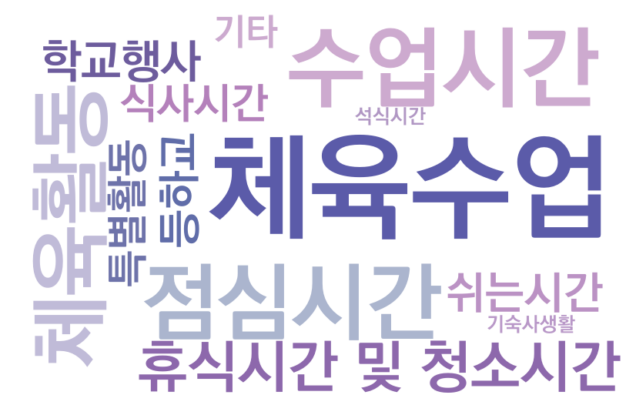

In [471]:
## 구체적인 건수가 중요하다기 보단 직관적으로 그 비중을 확인하고 싶기 때문에 word cloud로 시각화함
# 색 조정 함수
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(210,300),np.random.randint(26,32),np.random.randint(45,80)))

# 워드클라우드 생성에 사용할 데이터 준비
word_freq = dict(zip(acc_time['사고시간'], acc_time['사고건수']))

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=500, background_color='white', colormap='viridis', max_font_size=150,relative_scaling=0.5,  # 상대 크기 조정
                      font_path='../dashboard/component/font/KoPubWorld Dotum_Pro Bold.otf',color_func=color_func ).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 사고시간별 사고 내용

In [46]:
# 카테고리를 수정함, 같은 카테고리로 묶일 수 있는 항목을 묶어줌
acc_time_analysis = acc_time.replace('체육수업','체육활동').replace('석식시간','식사시간').replace('점심시간','식사시간').replace('쉬는시간','휴식시간 및 청소시간').groupby('사고시간').sum()[['사고건수']].reset_index().sort_values('사고건수')
acc_time_analysis

,사고시간,사고건수
0,기숙사생활,1911
1,기타,20743
6,특별활동,27755
2,등하교,30732
7,학교행사,34171
3,수업시간,83501
8,휴식시간 및 청소시간,86185
4,식사시간,106599
5,체육활동,220363


In [434]:
## 안전 사고 발생 사고시간 Top 5
fig = px.bar(acc_time_analysis.tail(5), x="사고건수", y='사고시간',color_discrete_sequence=[palette[0]])
fig.update_layout(    
            font=dict({'family':'KoPubWorld돋움체_Pro',
                    'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
            hoverlabel=dict(        #호버 박스 폰트 설정
                # bgcolor="white",
                font_size=15,
                font_family="KoPubWorld돋움체_Pro"
            ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            legend_title_text='  ',
            yaxis_ticksuffix="  ",
            
            # barcornerradius=15
            )
# hovertemplate 설정
fig.update_traces(hovertemplate='사고시간 : %{y}<br>사고건수 : %{x}건<extra></extra>')

fig.update_xaxes(title=' ',
                title_font_family='KoPubWorld돋움체 Medium',
                tickfont=dict(size=14),
                tickformat="~2s",
                )

fig.update_yaxes(title=' ',
                tickfont=dict(size=17)
                )

#### 2023년 사고시간별 하루 평균 사고 발생 수

In [49]:
## 2023년 하루 평균 사고 발생 수
time_oneday = temp_df[temp_df['연도']==2023].groupby(['사고시간']).count()[['구분']].reset_index()
time_oneday

,사고시간,구분
0,기타,9928
1,등하교,8393
2,수업시간,20641
3,쉬는시간,31679
4,식사시간,27344
5,체육활동,68020
6,특별활동,10028
7,학교행사,12251


In [50]:
time_oneday['하루평균사고수'] = round(time_oneday['구분']/365,1) # 주말제외하고 1년 246일로 계산해야하지 않을까? -- 사고시간별 사고수 그래프 옆에 Top 5만 수치로 적어주면 어떨지?
time_oneday.sort_values('하루평균사고수',inplace=True)
time_oneday

,사고시간,구분,하루평균사고수
1,등하교,8393,23.0
0,기타,9928,27.2
6,특별활동,10028,27.5
7,학교행사,12251,33.6
2,수업시간,20641,56.6
4,식사시간,27344,74.9
3,쉬는시간,31679,86.8
5,체육활동,68020,186.4


#### 시간별 사고수

In [473]:
## 안전사고 발생 Top 5 사고시간 데이터만 추출
time_analysis_df = temp_df.replace('체육수업','체육활동').replace('석식시간','식사시간').replace('점심시간','식사시간').replace('쉬는시간','휴식시간 및 청소시간')
time_analysis_other_df = time_analysis_df[time_analysis_df['사고시간'].isin(['체육활동','식사시간','휴식시간 및 청소시간','수업시간','학교행사'])]
time_analysis_how_df = time_analysis_other_df.groupby(['사고시간','사고당시활동']).count()[['구분']].reset_index()
time_analysis_how_df

,사고시간,사고당시활동,구분
0,수업시간,공부,15494
1,수업시간,구기운동,16550
2,수업시간,기타,12595
3,수업시간,기타운동,4670
4,수업시간,보행/주행,8617
5,수업시간,식사/수면/휴식,1360
6,수업시간,실험실습,10382
7,수업시간,장난/놀이,13833
8,식사시간,공부,144
9,식사시간,구기운동,32543


In [478]:
# Treemap 생성
fig = px.treemap(
    time_analysis_how_df,
    path=['사고시간', '사고당시활동'],  # Treemap의 경로 (계층 구조)
    values='구분',  # 크기 값
    title='사고시간 및 사고당시활동에 따른 사고 분포',
    color_discrete_sequence=palette
)

# 텍스트 크기를 크게 조정
# fig.update_traces(textinfo="label+value+percent entry", textfont_size=16)
fig.update_traces(textinfo="label+value", textfont_size=16,    
                  hoverinfo='none',  # Hover 정보를 숨김 
                  hovertemplate=None  # Hover 템플릿을 비활성화
                  )
fig.update_layout(   
            font=dict({'family':'KoPubWorld돋움체_Pro',
                    'color':'black',
                    'size':20}), #전체 폰트 설정(로컬 폰트 사용 가능)
            # hoverlabel=dict(        #호버 박스 폰트 설정
            #     # bgcolor="white",
            #     font_size=15,
            #     font_family="KoPubWorld돋움체_Pro"
            # ),
            paper_bgcolor='white',  # 전체 배경색
            plot_bgcolor='white',    # 플롯 배경색
            legend_title_text='  ',
            height=500,
            showlegend=False,  # 범례 숨기기
            )

# Treemap 시각화
fig.show()

### 지도시각화

In [57]:
# korea_geojson2 = gpd.read_file('korea_geojson2.geojson')
# korea_geojson2

In [58]:
geodf1 = df.groupby(['지역']).count()[['구분']].reset_index()
geodf1

KeyError: '지역'

In [ ]:
def extract_region(name):
    if name in ['충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도']:
        return name[:1] + name[2]
    elif name == '강원특별자치도':
        return name[:2]
    else:
        return name[:2]

In [ ]:
# 지역 표기 형식 변경 함수
def extract_region(name):
    if name in ['충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도']:
        return name[:1] + name[2]
    elif name == '강원특별자치도':
        return name[:2]
    else:
        return name[:2]

# geojson파일 불러오기
TL_geojson = gpd.read_file('TL_SCCO_CTPRVN.json')
TL_geojson = TL_geojson.replace('강원도','강원특별자치도') # 강원도 표기 변경
TL_geojson['지역'] = TL_geojson['CTP_KOR_NM'].apply(extract_region) # 학교 안전사고 데이터와 지역 표기 형식 맞추기(충청남도->충북)
TL_geojson_loads = json.loads(TL_geojson.to_json()) # geojson 데이터프레임을 json 형식으로 변환
merged = TL_geojson.merge(geodf1, on='지역')
merged

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry,지역,구분
0,42,Gangwon-do,강원특별자치도,"POLYGON ((128.54881 38.30195, 128.56009 38.257...",강원,22471
1,41,Gyeonggi-do,경기도,"POLYGON ((127.11055 38.24157, 127.14734 38.241...",경기,182400
2,48,Gyeongsangnam-do,경상남도,"POLYGON ((128.23751 34.83847, 128.26501 34.818...",경남,38707
3,47,Gyeongsangbuk-do,경상북도,"POLYGON ((129.57892 36.05176, 129.57496 36.004...",경북,25010
4,29,Gwangju,광주광역시,"POLYGON ((126.76105 35.25857, 126.76118 35.258...",광주,18428
5,27,Daegu,대구광역시,"POLYGON ((128.72133 36.00636, 128.72189 36.006...",대구,28295
6,30,Daejeon,대전광역시,"POLYGON ((127.40151 36.4868, 127.40237 36.4860...",대전,18082
7,26,Busan,부산광역시,"POLYGON ((128.82866 35.08993, 128.8509 35.0420...",부산,33804
8,11,Seoul,서울특별시,"POLYGON ((127.12449 37.46664, 127.12421 37.466...",서울,96414
9,36,Sejong-si,세종특별자치시,"POLYGON ((127.20794 36.71919, 127.20793 36.719...",세종,8923


In [ ]:
### 지도시각화 시도

# geojson = merged.to_json()
# geo_json = json.loads(geojson)

fig = px.choropleth_mapbox(
    merged,
    geojson=TL_geojson_loads,
    locations='CTP_KOR_NM',
    featureidkey="properties.CTP_KOR_NM",
    color='구분',
    color_continuous_scale="OrRd",
    mapbox_style="carto-positron",
    zoom=6,
    center={"lat": 36.5, "lon": 127.5},
    opacity=0.5,
    labels={'구분': 'Accident Count'}
)
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
